In [44]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
df = pd.read_csv('auto-mpg.csv')

In [60]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [62]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [63]:
df = df.replace('?', np.nan)

In [64]:
df[df['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [65]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [69]:
df = df.drop(columns=['car name'], axis=1)

In [70]:
df1 = df.copy()

In [71]:
df1 = df1.apply(lambda x: x.fillna(x.median()), axis=0)

In [78]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [146]:
df1.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [150]:
df1['horsepower'] = df1['horsepower'].astype(float)

In [151]:
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

<Axes: >

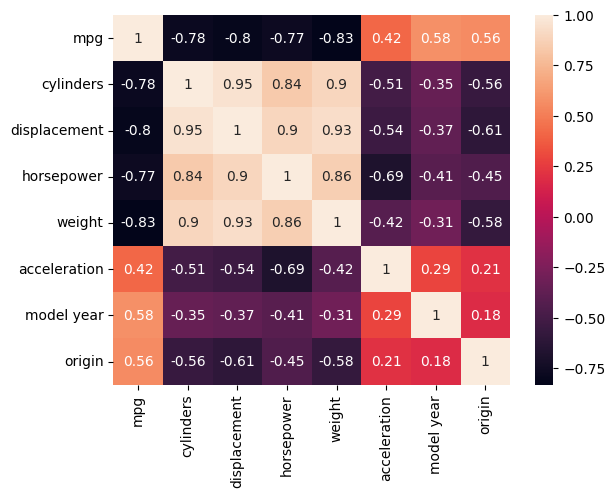

In [175]:
sns.heatmap(df1.corr(), annot=True)

In [171]:
## Splitting the data

X = df1.drop('mpg', axis=1)

y = df1[['mpg']]

In [172]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

cylinders
0.5249335774421718


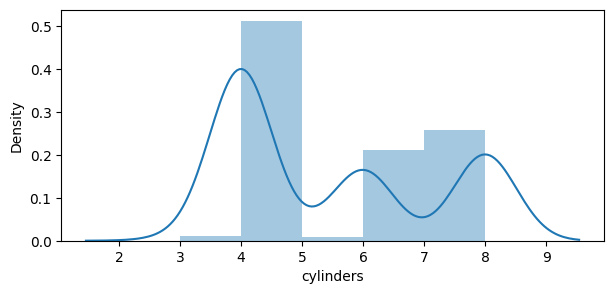

displacement
0.716930089340474


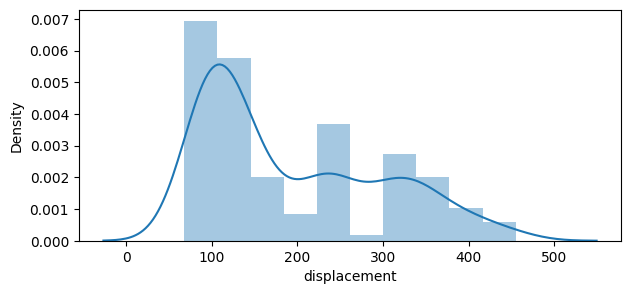

horsepower
1.1020507336340302


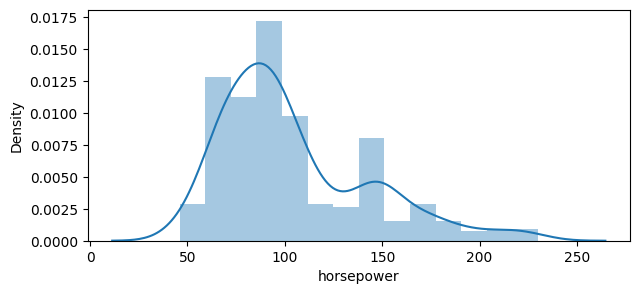

weight
0.5290589216608383


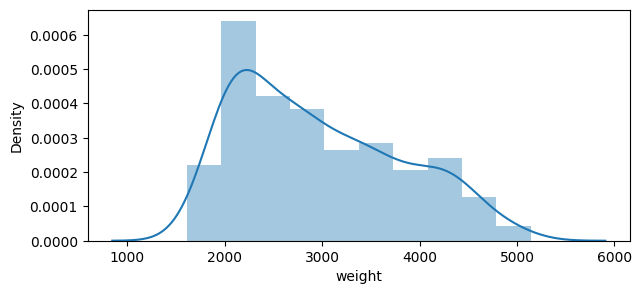

acceleration
0.27772507624356363


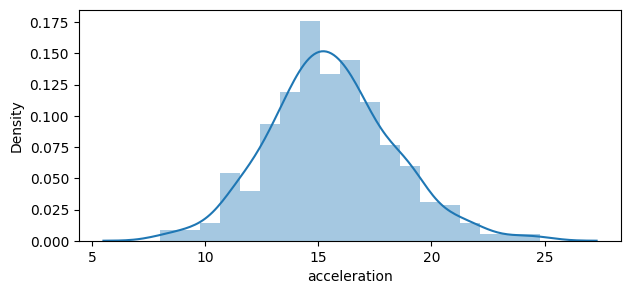

model year
0.011491076335909905


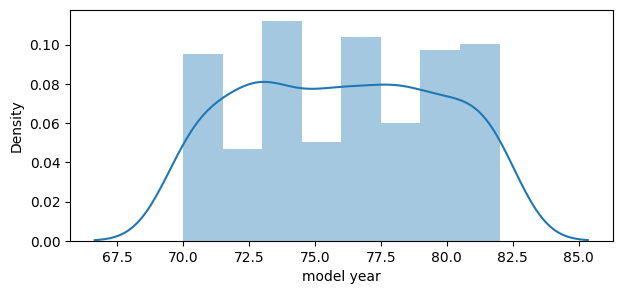

origin
0.9202910792259871


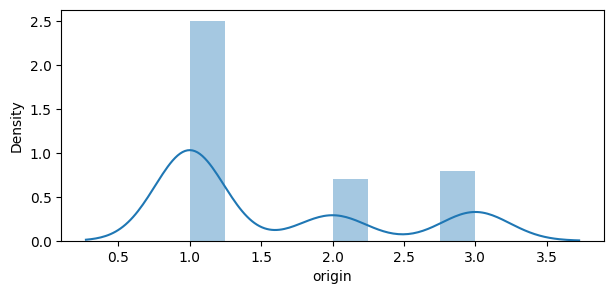

In [174]:
from scipy.stats import skew

a = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

for i in a:
    print(i)
    print(skew(X[i]))
    
    plt.figure(figsize=(7,3))
    sns.distplot(X[i])
    plt.show()

    -- Displacement, horsepower, weight, Origions are right skewed
    -- Acceleration is normaly distributed
    -- model year is normal but wider in center
    -- Cylinders has only certain values which repeating often.

### Transforming the data

In [181]:
df2 = X.copy()

0.40665217541068455


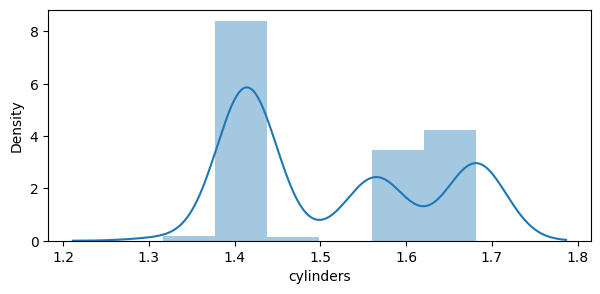

In [184]:
df2['cylinders'] = np.sqrt(df2['cylinders'])
print(skew(df2['cylinders']))
plt.figure(figsize=(7,3))
sns.distplot(df2['cylinders'])
plt.show()

0.3662346746703408


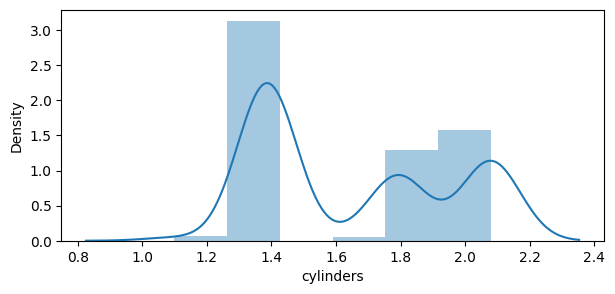

In [188]:
df2['cylinders'] = np.log(df2['cylinders'])
print(skew(df2['cylinders']))
plt.figure(figsize=(7,3))
sns.distplot(df2['cylinders'])
plt.show()

1.062481770869872


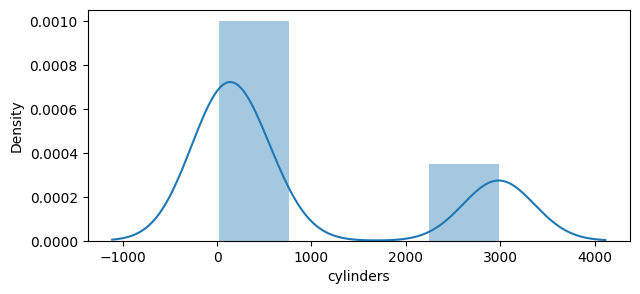

In [195]:
df2 = X.copy()

df2['cylinders'] = np.exp(df2['cylinders'])
print(skew(df2['cylinders']))
plt.figure(figsize=(7,3))
sns.distplot(df2['cylinders'])
plt.show()

0.46808278193423


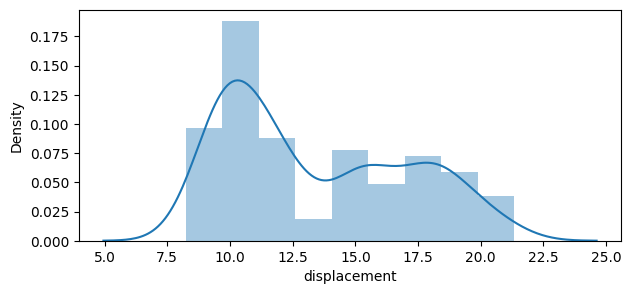

In [185]:
df2 = X.copy()

df2['displacement'] = np.sqrt(df2['displacement'])
print(skew(df2['displacement']))
plt.figure(figsize=(7,3))
sns.distplot(df2['displacement'])
plt.show()

0.3867778824048756


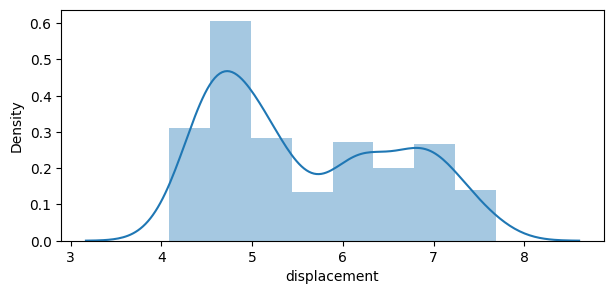

In [198]:
df2 = X.copy()

df2['displacement'] = np.cbrt(df2['displacement'])
print(skew(df2['displacement']))
plt.figure(figsize=(7,3))
sns.distplot(df2['displacement'])
plt.show()

0.22515032161788093


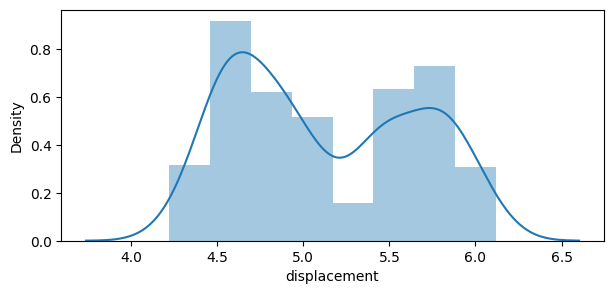

In [197]:
df2 = X.copy()

df2['displacement'] = np.log(df2['displacement'])
print(skew(df2['displacement']))
plt.figure(figsize=(7,3))
sns.distplot(df2['displacement'])
plt.show()

In [ ]:
df2 = X.copy()

df2['displacement'] = np.sqrt(df2['displacement'])
print(skew(df2['displacement']))
plt.figure(figsize=(7,3))
sns.distplot(df2['displacement'])
plt.show()

0.7445652633527988


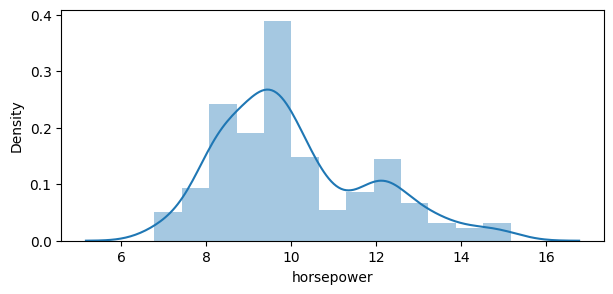

In [186]:
df2['horsepower'] = np.sqrt(df2['horsepower'])
print(skew(df2['horsepower']))
plt.figure(figsize=(7,3))
sns.distplot(df2['horsepower'])
plt.show()

0.3779541736074284


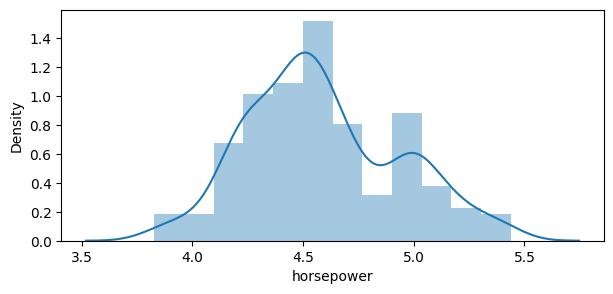

In [196]:
df2['horsepower'] = np.log(df2['horsepower'])
print(skew(df2['horsepower']))
plt.figure(figsize=(7,3))
sns.distplot(df2['horsepower'])
plt.show()

0.8204481102830337


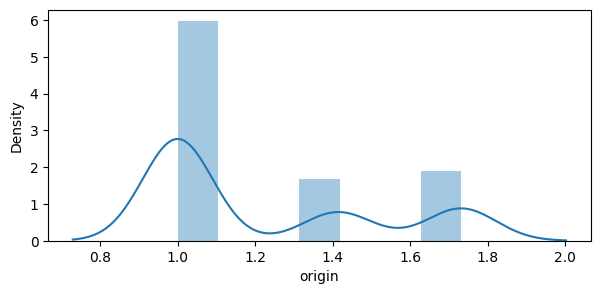

In [187]:
df2['origin'] = np.sqrt(df2['origin'])
print(skew(df2['origin']))
plt.figure(figsize=(7,3))
sns.distplot(df2['origin'])
plt.show()

<Axes: ylabel='count'>

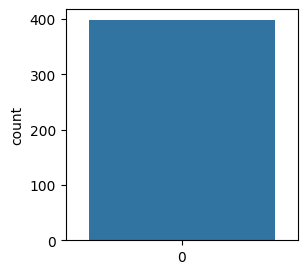

In [91]:
plt.figure(figsize=(3,3))
sns.countplot(X['origin'])

<Axes: xlabel='mpg', ylabel='Density'>

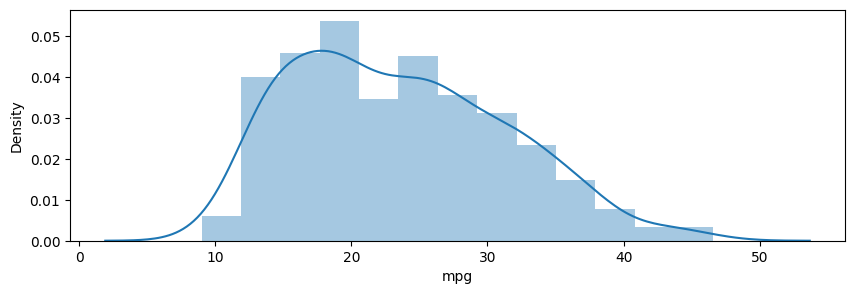

In [96]:
## Distribution of dependent variable

plt.figure(figsize=(10,3))
sns.distplot(y['mpg'])

### Dependent variable looks right skewed

###  Scaling the data

In [97]:
from sklearn.preprocessing import StandardScaler

In [99]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

y_scaled = ss.fit_transform(y)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=3)

## Model selection

    -- Linear Regression

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_test)

In [108]:
print('R2_score: ', r2_score(y_test, y_pred))

R2_score:  0.806999088912425


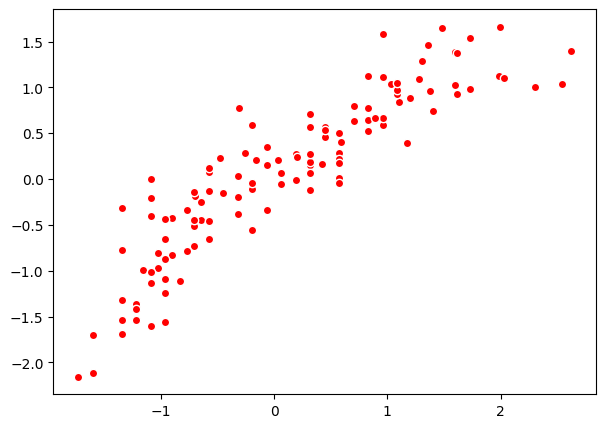

In [133]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, edgecolor='w', label='MPG', c='red')

In [111]:
lr.coef_

array([[-0.13550108,  0.41541343, -0.19642818, -0.69088928,  0.02338689,
         0.34265722,  0.17307744]])

In [132]:
for idx, col in enumerate(X.columns):
    print('The coefficient of {} is {}'.format(col, lr.coef_[0][idx]))

The coefficient of cylinders is -0.1355010835281724
The coefficient of displacement is 0.41541342592022
The coefficient of horsepower is -0.19642818441289073
The coefficient of weight is -0.6908892834681013
The coefficient of acceleration is 0.023386891461960206
The coefficient of model year is 0.3426572208525863
The coefficient of origin is 0.17307744023138952


In [135]:
lr.intercept_[0]

-0.011231076084838944

### Regularized Ridge model

In [137]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

for idx, col in enumerate(X.columns):
    print('The coefficient of {} is {}'.format(col, ridge.coef_[0][idx]))

The coefficient of cylinders is -0.130474174082377
The coefficient of displacement is 0.39943038559731986
The coefficient of horsepower is -0.195362738213746
The coefficient of weight is -0.6821021402329276
The coefficient of acceleration is 0.02181634394548691
The coefficient of model year is 0.3417939766596348
The coefficient of origin is 0.17202793519112572


In [139]:
ridge.intercept_[0]

-0.01163388643114082

In [138]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

for idx, col in enumerate(X.columns):
    print('The coefficient of {} is {}'.format(col, ridge.coef_[0][idx]))

The coefficient of cylinders is -0.12020122201136543
The coefficient of displacement is 0.36548966696812857
The coefficient of horsepower is -0.1932378465212786
The coefficient of weight is -0.6629265364368794
The coefficient of acceleration is 0.018427380207658047
The coefficient of model year is 0.3398687563560783
The coefficient of origin is 0.16980391770128625


### Lasso regression

In [145]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

for i, col in enumerate(X.columns):
    print('The Lasso model coefficient for {} is {}'.format(col, lasso.coef_[i]))

The Lasso model coefficient for cylinders is -0.0
The Lasso model coefficient for displacement is -0.0
The Lasso model coefficient for horsepower is -0.08269679615112813
The Lasso model coefficient for weight is -0.5262018165145451
The Lasso model coefficient for acceleration is 0.0
The Lasso model coefficient for model year is 0.2542481725725852
The Lasso model coefficient for origin is 0.05880546880369437


###  Many of the Coefficients have became 0 so we can drop of those dimensions from the model. It has taken only 5 dimensions to build the model. Lasso is also used for feature selection.

###  Comparing the scores

In [153]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8214872740405621
0.806999088912425


In [154]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8213343238951143
0.8083889680100691


In [155]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.793122651849692
0.7865501443065583


Here's the performance of lasso slightly gone down but this model used only 5 dimensions while other two used 8 dimensions. This model is feasible compared to other two because dimensions are reduced

### We'll use Polynomial features to understand ridge and lasso better.

In [158]:
from sklearn.preprocessing import PolynomialFeatures

In [159]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [160]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1)
X_train.shape

(278, 29)

Our dimensions are increased by 29

### Simple Non regularized linear model on poly features

In [163]:
lr.fit(X_train, y_train)
print(lr.coef_[0])

[ 2.76250572e+13  7.27451322e-01 -1.39200215e+00 -1.77677191e+00
 -4.68903156e+00 -3.89906258e-01  2.90680427e+00  6.20842151e-01
  1.69727016e-01 -1.78810611e-01  1.40501753e+00  7.12285551e-01
 -1.05870574e+00  2.99702020e-01  1.48224971e-01  8.61984176e-01
 -5.24657821e-01  3.00085759e+00  2.04143370e+00 -1.53573088e-01
 -9.54261900e-01 -1.51137932e+00  1.60778236e+00  5.77405395e-01
 -5.32841470e-01 -1.89857628e+00  5.00806874e-01  1.50533135e+00
  1.10253666e+00]


In [166]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.888697267581892
0.8601543017697599


In [164]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

ridge.coef_

array([[ 0.        ,  0.64813084, -0.36554878, -2.46919357, -4.70667241,
        -0.63510083,  2.8499319 ,  0.96173248, -0.49248204, -0.57492325,
         1.37951065,  1.0927984 , -1.42036657,  0.89110432, -0.16927823,
         1.35119104, -1.1349459 ,  3.21038276,  1.16514278,  0.22836119,
        -0.89663938, -1.35284633,  0.79573939,  0.58576253, -0.61776911,
        -0.88637153,  0.54014514,  1.23036832,  0.88256903]])

In [165]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8924614223751737
0.8615025469455584


In [167]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso.coef_

array([ 0.        , -0.        , -0.37802101, -2.04156884, -4.64843934,
       -0.        ,  2.78580954,  0.05433586, -0.        ,  0.        ,
        0.07086347,  0.        , -0.        ,  0.        ,  0.        ,
        1.16818735,  0.        ,  0.        ,  0.        ,  0.36475302,
       -0.        , -0.61170462,  0.        , -0.        , -0.        ,
        0.        ,  0.24737398,  0.6555845 ,  0.34807138])

In [168]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8783598485420683
0.8780043695312


### Lasso is getting 87% accuracy with nearly half the number of the dimensions.

### Lasso is also used for feature selection and dimensionality reduction technique,